In [1]:
%autosave 60

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Autosaving every 60 seconds


# Linear regression with one variable

In [2]:
# x = [1, 2, 3, 4, 5]
# y = [0.5, 2, 2.5, 4, 4.5]

data = pd.read_csv('data/linear_reg1.txt', header=None)
data = np.array(data.values, dtype = np.float64)

x = np.expand_dims(data[:, 0], axis=1)
y = np.expand_dims(data[:, 1], axis=1)

print(x.shape, y.shape)

(97, 1) (97, 1)


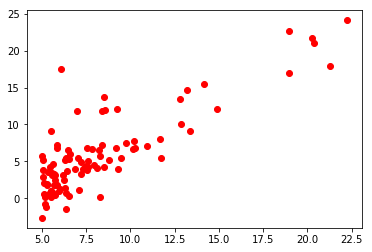

In [3]:
plt.plot(x, y, 'ro')
plt.show()

In [4]:
def mse(out, y, m):
    error = np.sum(np.square(out-y))/(2*m)
    return error

In [5]:
def train(x, y, m, lr, itr):
    np.random.seed(0)
    
    history = []
    theta0 = np.random.randn()
    theta1 = np.random.randn()
    
    # calculations are done without vectorization
    for i in range(itr):
        h = theta0 + (theta1*x)
        
        # np.multiply finds product of an element from 1st array and 
        # the corresponding element on same position of 2nd array. Eg:
        # >>> a
        # array([0.83311065, 0.09033762])
        # >>> b
        # array([0.23645678, 0.36961283])
        # >>> np.multiply(a,b)
        # array([0.19699466, 0.03338995])
        diff1 = np.sum(h - y)/m
        diff2 = (x.T.dot(h - y))/m
        
        # Update learning parameters theta
        theta0 = theta0 - lr*diff1
        theta1 = theta1 - lr*diff2
        
        history.append(mse(theta0 + (theta1*x), y, len(x)))
    
    return theta0, theta1, history

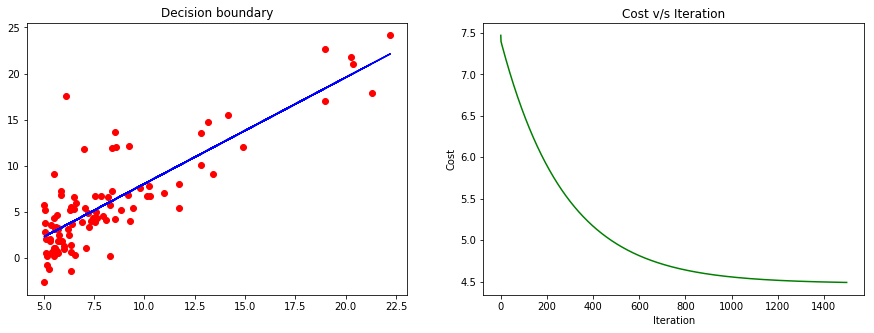

In [6]:
lr = 0.01
iterations = 1500
theta1, theta2, history = train(x, y, len(x), lr, iterations)
out = theta1 + theta2*x

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(x, y, 'ro')
ax1.plot(x, out, 'b')
ax1.title.set_text('Decision boundary')

ax2.plot(range(iterations), history, 'g')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.title.set_text('Cost v/s Iteration')

# Linear regression with multiple variables

In [7]:
data_multi = pd.read_csv('data/linear_reg2.txt', header=None)
data_multi = np.array(data_multi.values, dtype = np.float64)

# Feature normalization
for i in range(len(data_multi[0])):
    data_multi[:,i] = data_multi[:,i]/(max(data_multi[:,i]) - min(data_multi[:,i]))

split = int(0.9*len(data_multi))
x_multi = data_multi[:split, :2]
# For utilizing vectorization later
x_multi = np.insert(x_multi, 0, 1, axis=1)
y_multi = np.expand_dims(data_multi[:split, 2], axis=1)

test_x_multi = data_multi[split:, :2]
test_x_multi = np.insert(test_x_multi, 0, 1, axis=1)
test_y_multi = np.expand_dims(data_multi[split:, 2], axis=1)

x_multi.shape, y_multi.shape

((42, 3), (42, 1))

In [8]:
def train_multi(x_multi, y_multi, m, lr, itr):
#     np.random.seed(0)
    num_ftrs = len(x_multi[0])
    
    history = []
    
    theta = np.random.rand(num_ftrs)
    theta = np.expand_dims(theta, axis=1)
    
    # utilizing vectorization unline in case of single variable in above section
    for i in range(itr):
        h = x_multi.dot(theta)
        diff = x_multi.T.dot(h - y_multi)/m        
        theta = theta - lr*diff
        history.append(mse(x_multi.dot(theta), y_multi, len(x_multi)))
    
    return theta, history

lr	itr	error
0.01	50	0.05237959053047301
0.01	100	0.0370300876378313
0.01	200	0.016757515809223928
0.01	500	0.009641084614953577
0.03	50	0.0067118395843767855
0.03	100	0.007914197465157738
0.03	200	0.005725176160544967
0.03	500	0.009301454059749002
0.001	50	0.10257176941189523
0.001	100	0.15896903220744577
0.001	200	0.016465524561375008
0.001	500	0.08012744348196624
0.003	50	0.31080689251430227
0.003	100	0.01988578357411338
0.003	200	0.033588094693691124
0.003	500	0.008275597137341106

Lowest error:0.005725176160544967 for lr:0.03 and itr:200

Plotting graph for lowest error...


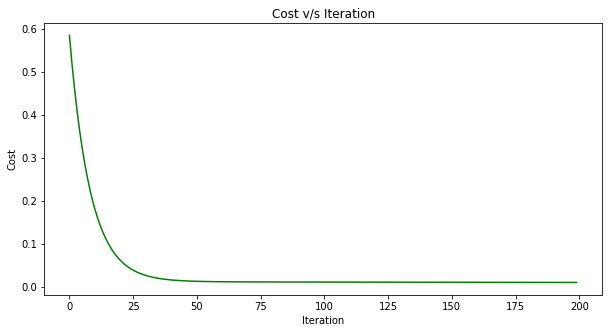

In [9]:
best_theta = best_out = best_history = None
best_lr = best_itr = 0
prev_cost = 1

print('lr\titr\terror')
for lr in [0.01, 0.03, 0.001, 0.003]:
    for itr in [50, 100, 200, 500]:
        theta, history = train_multi(x_multi, y_multi, len(x_multi), lr, itr)
        out = test_x_multi.dot(theta)
        curr_cost = mse(out, test_y_multi, len(out))
        print('{}\t{}\t{}'.format(lr, itr, curr_cost))
        if curr_cost < prev_cost:
            prev_cost = curr_cost
            best_theta = theta
            best_lr = lr
            best_itr = itr
            best_out = out
            best_history = history
            
print('\nLowest error:{} for lr:{} and itr:{}'.format(prev_cost, best_lr, best_itr))
print('\nPlotting graph for lowest error...')
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.plot(range(best_itr), best_history, 'g')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.title.set_text('Cost v/s Iteration')